In [1]:
from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import matplotlib.pyplot as plt

In [2]:
import logging
logging.basicConfig(level=logging.INFO, force = True)
logger = logging.getLogger()
logger.info("Logging initialized")

INFO:root:Logging initialized


In [3]:
loss_list = []
class Callback(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_list.append(loss)
        logger.info('Loss after epoch {}:{}'.format(self.epoch, loss))
        model.running_training_loss = 0.0
        self.epoch = self.epoch + 1

In [4]:
model = Word2Vec(vector_size=200, window=3, min_count=10, workers=5)

INFO:gensim.utils:Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=200, alpha=0.025>', 'datetime': '2023-05-21T08:53:24.121474', 'gensim': '4.3.1', 'python': '3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:58:31) [Clang 14.0.6 ]', 'platform': 'macOS-12.6-arm64-arm-64bit', 'event': 'created'}


In [5]:
sentences = LineSentence('processed-corpus.txt')

In [6]:
model.build_vocab(sentences, progress_per=5000000)

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #5000000, processed 40831628 words, keeping 101552 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #10000000, processed 81753225 words, keeping 114802 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #15000000, processed 122575037 words, keeping 122333 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #20000000, processed 163439274 words, keeping 127317 word types
INFO:gensim.models.word2vec:collected 130029 word types from a corpus of 191558143 raw words and 23453583 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=10 retains 79373 unique words (61.04% of original 130029, drops 50656)', 'datetime': '2023-05-21T08:54:10.497269', 'gensim': '4.3.1', 'python':

In [7]:
#we override alpha with small values, since default values result in poor train performance. See loss plot below
model.train(sentences, epochs=100, start_alpha=0.0001, end_alpha=0.00001, total_examples=model.corpus_count, total_words=model.corpus_total_words, compute_loss=True, report_delay=300, callbacks=[Callback()])


INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'training model with 5 workers on 79373 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=3 shrink_windows=True', 'datetime': '2023-05-21T08:54:10.968830', 'gensim': '4.3.1', 'python': '3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:58:31) [Clang 14.0.6 ]', 'platform': 'macOS-12.6-arm64-arm-64bit', 'event': 'train'}
INFO:gensim.models.word2vec:EPOCH 0 - PROGRESS: at 0.95% examples, 1704585 words/s, in_qsize 5, out_qsize 3
INFO:gensim.models.word2vec:EPOCH 0: training on 191558143 raw words (185893187 effective words) took 101.2s, 1836535 effective words/s
INFO:root:Loss after epoch 0:37360480.0
INFO:gensim.models.word2vec:EPOCH 1 - PROGRESS: at 0.92% examples, 1701936 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 1: training on 191558143 raw words (185894087 effective words) took 101.5s, 1830626 effective words/s
INFO:root:Loss after epoch 1:47930048.0
INFO:gensim.models.word2ve

INFO:gensim.models.word2vec:EPOCH 27: training on 191558143 raw words (185893476 effective words) took 101.1s, 1838213 effective words/s
INFO:root:Loss after epoch 27:39205360.0
INFO:gensim.models.word2vec:EPOCH 28 - PROGRESS: at 0.99% examples, 1838713 words/s, in_qsize 7, out_qsize 2
INFO:gensim.models.word2vec:EPOCH 28: training on 191558143 raw words (185894491 effective words) took 100.6s, 1848046 effective words/s
INFO:root:Loss after epoch 28:38808624.0
INFO:gensim.models.word2vec:EPOCH 29 - PROGRESS: at 0.99% examples, 1826337 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 29: training on 191558143 raw words (185892412 effective words) took 99.6s, 1867170 effective words/s
INFO:root:Loss after epoch 29:38825524.0
INFO:gensim.models.word2vec:EPOCH 30 - PROGRESS: at 1.00% examples, 1800278 words/s, in_qsize 8, out_qsize 3
INFO:gensim.models.word2vec:EPOCH 30: training on 191558143 raw words (185892987 effective words) took 99.5s, 1868400 effective words/s
INFO

INFO:gensim.models.word2vec:EPOCH 56 - PROGRESS: at 0.96% examples, 1763493 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 56: training on 191558143 raw words (185893334 effective words) took 100.5s, 1848844 effective words/s
INFO:root:Loss after epoch 56:37820088.0
INFO:gensim.models.word2vec:EPOCH 57 - PROGRESS: at 1.02% examples, 1887040 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 57: training on 191558143 raw words (185893104 effective words) took 101.6s, 1829106 effective words/s
INFO:root:Loss after epoch 57:37525160.0
INFO:gensim.models.word2vec:EPOCH 58 - PROGRESS: at 1.01% examples, 1868637 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 58: training on 191558143 raw words (185892774 effective words) took 101.7s, 1828401 effective words/s
INFO:root:Loss after epoch 58:38224424.0
INFO:gensim.models.word2vec:EPOCH 59 - PROGRESS: at 0.99% examples, 1827935 words/s, in_qsize 10, out_qsize 0
INFO:gensim.models.word2vec:E

INFO:root:Loss after epoch 84:39360312.0
INFO:gensim.models.word2vec:EPOCH 85 - PROGRESS: at 0.97% examples, 1790079 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 85: training on 191558143 raw words (185891302 effective words) took 102.1s, 1820386 effective words/s
INFO:root:Loss after epoch 85:38118572.0
INFO:gensim.models.word2vec:EPOCH 86 - PROGRESS: at 0.97% examples, 1786912 words/s, in_qsize 10, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 86: training on 191558143 raw words (185890633 effective words) took 102.3s, 1816639 effective words/s
INFO:root:Loss after epoch 86:36954804.0
INFO:gensim.models.word2vec:EPOCH 87 - PROGRESS: at 0.98% examples, 1819574 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 87: training on 191558143 raw words (185895499 effective words) took 102.9s, 1805847 effective words/s
INFO:root:Loss after epoch 87:37332404.0
INFO:gensim.models.word2vec:EPOCH 88 - PROGRESS: at 0.97% examples, 1787766 words/s, in_qsize 9, 

(18589326095, 19155814300)

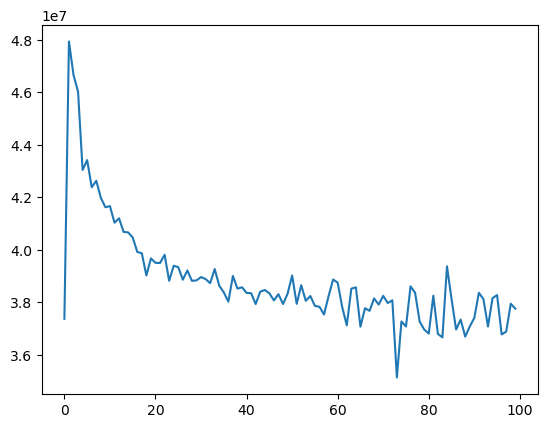

In [8]:
plt.plot(loss_list)

For comaprison, below is the loss plot when using default (larger) values for alpha. Note, that during training alpha is decreasing linearly from start value to end value. With default values in use the loss goes down near the end, once alpha gets smaller values.

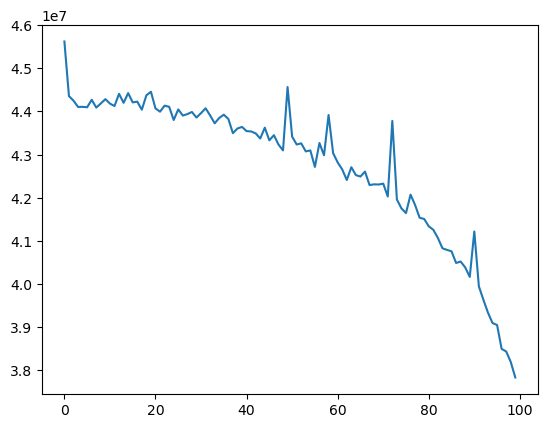

In [9]:
default_alpha_loss_list = [45621836.0, 44355904.0, 44249936.0, 44104492.0, 44107028.0, 44097436.0, 44270596.0, 44089604.0, 44185456.0, 44285424.0, 44182396.0, 44126032.0, 44408908.0, 44199988.0, 44425624.0, 44209516.0, 44227556.0, 44041368.0, 44373620.0, 44456688.0, 44070200.0, 43995008.0, 44134528.0, 44107632.0, 43802268.0, 44047244.0, 43904480.0, 43939264.0, 43987436.0, 43859148.0, 43961468.0, 44073332.0, 43907992.0, 43725336.0, 43849884.0, 43924944.0, 43826232.0, 43496588.0, 43605268.0, 43641544.0, 43543980.0, 43537204.0, 43491140.0, 43373268.0, 43624628.0, 43330720.0, 43449924.0, 43234040.0, 43097712.0, 44565932.0, 43416728.0, 43234072.0, 43260536.0, 43074152.0, 43096868.0, 42714596.0, 43268708.0, 42984456.0, 43917916.0, 43035192.0, 42818392.0, 42656488.0, 42411144.0, 42707748.0, 42523348.0, 42491780.0, 42605616.0, 42294312.0, 42310540.0, 42306532.0, 42327836.0, 42028380.0, 43780020.0, 41960848.0, 41753348.0, 41644528.0, 42072300.0, 41830796.0, 41535968.0, 41507712.0, 41336916.0, 41256888.0, 41069008.0, 40828812.0, 40791320.0, 40758012.0, 40487952.0, 40521400.0, 40385292.0, 40164828.0, 41217672.0, 39945608.0, 39633816.0, 39335348.0, 39096012.0, 39050096.0, 38497092.0, 38436708.0, 38193532.0, 37834140.0]
plt.plot(default_alpha_loss_list)

In [10]:
model.wv.most_similar('сабака', topn=20)

[('котка', 0.8491295576095581),
 ('кошка', 0.8478345274925232),
 ('кот', 0.8396984338760376),
 ('жывёліна', 0.8325167298316956),
 ('дзік', 0.8212528824806213),
 ('кацяня', 0.8191012740135193),
 ('сабачка', 0.8000214099884033),
 ('конь', 0.7966150641441345),
 ('пацук', 0.7885372042655945),
 ('авечка', 0.7855023741722107),
 ('муха', 0.7850183844566345),
 ('воўк', 0.7843751907348633),
 ('шчанюк', 0.7826115489006042),
 ('малпа', 0.7747521996498108),
 ('лісіца', 0.7739136219024658),
 ('каза', 0.7702525854110718),
 ('звер', 0.7693645358085632),
 ('асёл', 0.7642199993133545),
 ('свіння', 0.7625622749328613),
 ('зграя', 0.758644163608551)]

In [11]:
model.wv.index_to_key[:10]

['быць',
 'год',
 'беларускі',
 'беларусь',
 'чалавек',
 'магчы',
 'час',
 'усё',
 'дзень',
 'большыць']

In [12]:
model.save("word2vec-cc100-cbow-d200-w3-min10.model")

INFO:gensim.utils:Word2Vec lifecycle event {'fname_or_handle': 'word2vec-cc100-cbow-d200-w3-min10.model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2023-05-21T13:02:16.156349', 'gensim': '4.3.1', 'python': '3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:58:31) [Clang 14.0.6 ]', 'platform': 'macOS-12.6-arm64-arm-64bit', 'event': 'saving'}
INFO:gensim.utils:storing np array 'vectors' to word2vec-cc100-cbow-d200-w3-min10.model.wv.vectors.npy
INFO:gensim.utils:storing np array 'syn1neg' to word2vec-cc100-cbow-d200-w3-min10.model.syn1neg.npy
INFO:gensim.utils:not storing attribute cum_table
INFO:gensim.utils:saved word2vec-cc100-cbow-d200-w3-min10.model


In [13]:
model.wv.save_word2vec_format('word2vec-cc100-cbow-d200-w3-min10.vectors')

INFO:gensim.models.keyedvectors:storing 79373x200 projection weights into word2vec-cc100-cbow-d200-w3-min10.vectors
